In [96]:
import pandas as pd
import missingno as msno

import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
sensors = pd.read_csv('../processed_data/aqs_california_merged_zipcode_20160101_20200831.csv')

In [31]:
print(sensors.shape)

display(sensors.head(100))

(371096, 15)


,Date,Lat,Lon,O3,PM2.5,PM10,SO2,NO2,CO,Temperature,Pressure,Humidity,Windspeed,Winddirection,Zipcode
0,2016-01-01,32.578160,-116.921350,0.038738,NaN,NaN,NaN,4.045455,NaN,NaN,NaN,NaN,2.529167,157.125000,92179
1,2016-01-01,32.631242,-117.059088,0.024718,NaN,NaN,NaN,14.590909,NaN,NaN,NaN,NaN,2.137500,126.083333,91910
2,2016-01-01,32.676180,-115.483070,0.023295,NaN,NaN,0.4,10.426087,0.361111,11.25,763.5,NaN,2.079167,302.125000,92231
3,2016-01-01,32.701492,-117.149653,0.017965,NaN,NaN,NaN,22.181818,0.471429,NaN,NaN,NaN,1.150000,132.083333,92113
4,2016-01-01,32.725226,-116.365203,0.043930,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016-01-01,35.051454,-119.402620,0.023290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.504167,180.541667,California
96,2016-01-01,35.123890,-120.632150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000,134.090909,93449
97,2016-01-01,35.239180,-118.788630,0.016055,NaN,NaN,NaN,NaN,0.226316,NaN,NaN,73.329167,1.941667,150.208333,California
98,2016-01-01,35.256510,-120.669300,0.016127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.837500,1.545833,182.958333,93401-8114


In [32]:
def describe_nulls(df, show_nulls_table=False):    
    print("Total rows: \n\t{:,}".format(len(df)))
    
    rows_with_any_NA = len(df[df.isnull().any(axis=1)])
    print("Rows; percent of rows that have *at least 1* missing value: \n\t{:,}; {}%".format(
        rows_with_any_NA, 100 * round(rows_with_any_NA / len(df), 2)))
    
    
    if show_nulls_table:
        nunique = df.nunique() # just compute this once.
    
        display(pd.DataFrame({
            'dtype': df.dtypes,
            'Number of nulls': df.isnull().sum(),
            '% null': 100 * round(df.isnull().sum() / len(df), 4),
            'Distinct Values': nunique,
            '% Distinct Values': 100 * round(nunique / len(df), 4),
        }))

    return

describe_nulls(sensors, show_nulls_table=True)

Total rows: 
	371,096
Rows; percent of rows that have *at least 1* missing value: 
	369,762; 100.0%


,dtype,Number of nulls,% null,Distinct Values,% Distinct Values
Date,object,0,0.00,1705,0.46
Lat,float64,0,0.00,275,0.07
Lon,float64,0,0.00,275,0.07
O3,float64,108492,29.24,62491,16.84
PM2.5,float64,268380,72.32,1510,0.41
PM10,float64,248681,67.01,542,0.15
SO2,float64,327222,88.18,84,0.02
NO2,float64,216778,58.42,26934,7.26
CO,float64,269443,72.61,2286,0.62
Temperature,float64,332593,89.62,1486,0.40


In [33]:
sensors.Lat.value_counts()

36.233274    1705
36.985119    1705
39.233477    1688
34.404281    1643
34.448060    1643
             ... 
38.556326     102
34.181977      89
33.793713      87
37.508162      76
35.621090      49
Name: Lat, Length: 275, dtype: int64

In [34]:
sensors.Zipcode.value_counts()

 California    57561
 93549          4636
 93545          4613
 93421          3285
 93530          3104
               ...  
 92401-1400      211
 95817           102
 91601            89
 90755            87
 94064            76
Name: Zipcode, Length: 217, dtype: int64

<AxesSubplot:>

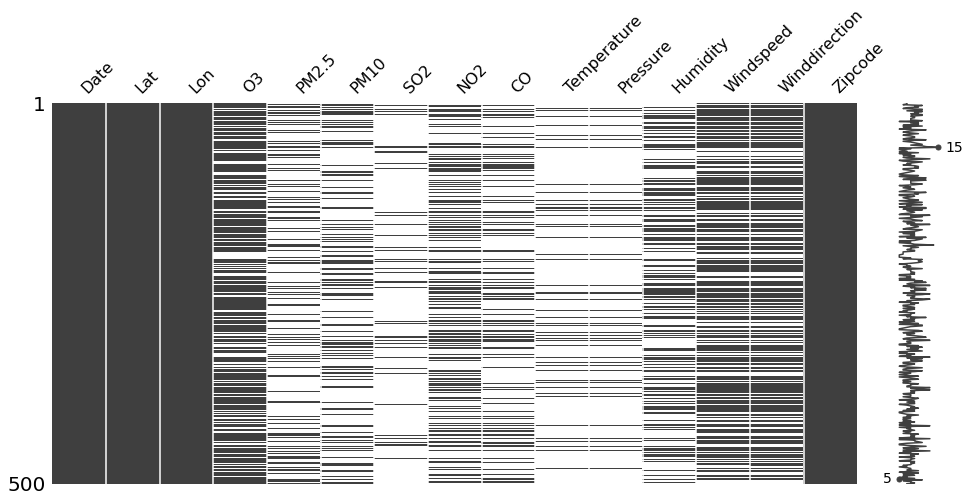

In [35]:
msno.matrix(sensors.sample(500),
            figsize=(16, 7),
            width_ratios=(15, 1))

<AxesSubplot:>

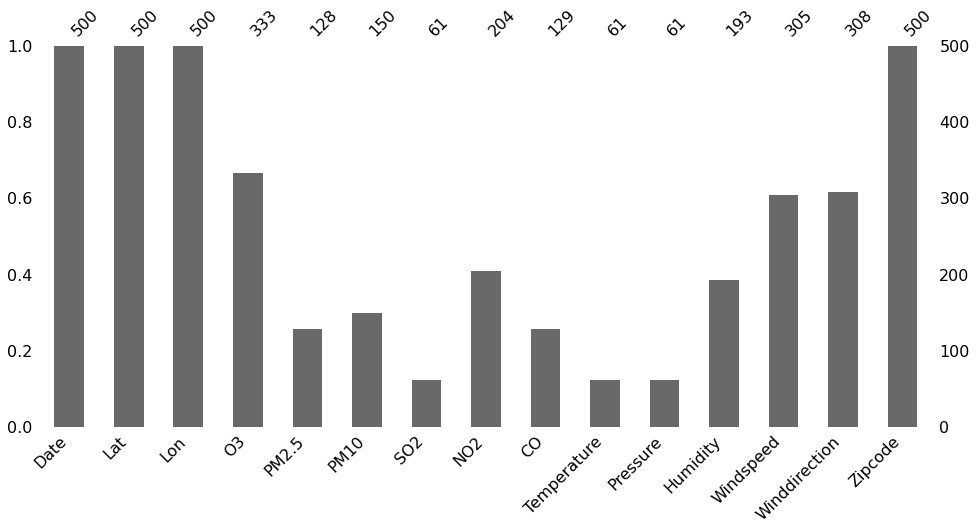

In [36]:
msno.bar(sensors.sample(500),
            figsize=(16, 7),)


## Create Tidy table

In [37]:
sensors.columns

Index(['Date', 'Lat', 'Lon', 'O3', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'Temperature', 'Pressure', 'Humidity', 'Windspeed', 'Winddirection',
       'Zipcode'],
      dtype='object')

In [142]:
spacetime_index = ['Date', 'Lat', 'Lon']

spacetime_columns = ['Lat', 'Lon','O3', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'Temperature', 'Pressure', 'Humidity', 'Windspeed', 'Winddirection']

In [46]:
# Count the unique variables (if we got different weight values, 
# for example, then we should get more than one unique value in this groupby)
all_cols_unique_sensors = sensors.groupby(spacetime_index).agg({col:'nunique' for col in spacetime_columns})
all_cols_unique_sensors.head(10)

O3  PM2.5  PM10  SO2  NO2  CO  Temperature  \
Date       Lat       Lon                                                       
2016-01-01 32.578160 -116.921350   1      0     0    0    1   0            0   
           32.631242 -117.059088   1      0     0    0    1   0            0   
           32.676180 -115.483070   1      0     0    1    1   1            1   
           32.701492 -117.149653   1      0     0    0    1   1            0   
           32.725226 -116.365203   1      1     0    0    0   0            0   
           32.792220 -115.563060   1      0     1    0    1   0            1   
           32.817978 -116.968133   1      0     0    1    1   1            1   
           32.842318 -116.768293   1      0     0    0    1   0            0   
           32.845709 -117.123964   1      0     0    0    1   0            0   
           32.952124 -117.264088   1      0     0    0    0   0            0   

                                  Pressure  Humidity  Windspeed  \
Date       Lat       Lon                                          
2016-01-01 32.578160 -116.921350         0         0          1   
           32.631242 -117.059088         0         0          1   
           32.676180 -115.483070         1         0          1   
           32.701492 -117.149653         0         0          1   
           32.725226 -116.365203         0         0          0   
           32.792220 -115.563060         1         0          1   
           32.817978 -116.968133         1         1          0   
           32.842318 -116.768293         0         1          1   
           32.845709 -117.123964         0         1          1   
           32.952124 -117.264088         0         0          1   

                                  Winddirection  Zipcode  
Date       Lat       Lon                                  
2016-01-01 32.578160 -116.921350              1        1  
           32.631242 -117.059088              1        1  
           32.676180 -115.483070              1        1  
           32.701492 -117.149653              1        1  
           32.725226 -116.365203              0        1  
           32.792220 -115.563060              1        1  
           32.817978 -116.968133              0        1  
           32.842318 -116.768293              1        1  
           32.845709 -117.123964              1        1  
           32.952124 -117.264088              1        1

In [47]:
all_cols_unique_sensors[all_cols_unique_sensors > 1].dropna().head()

,,,O3,PM2.5,PM10,SO2,NO2,CO,Temperature,Pressure,Humidity,Windspeed,Winddirection,Zipcode
Date,Lat,Lon,,,,,,,,,,,,


In [64]:
test = pd.DataFrame(
    {'date':  [1  ,     1,    1,    2,    2,   3],
     'zip':   [100  , 100,  200,  200,  100, 200],
     'size':  [ 40,  None,   50, None,   30, 30 ],
     'class': [3  ,     2, None,    3,    1, None]
        
    })

display(test)
display(test.groupby(['date', 'zip']).agg({col:'max' for col in ['size', 'class']}))

,date,zip,size,class
0,1,100,40.0,3.0
1,1,100,NaN,2.0
2,1,200,50.0,NaN
3,2,200,NaN,3.0
4,2,100,30.0,1.0
5,3,200,30.0,NaN


size  class
date zip             
1    100  40.0    3.0
     200  50.0    NaN
2    100  30.0    1.0
     200   NaN    3.0
3    200  30.0    NaN

In [150]:
zipcode_group = sensors.groupby(['Date', 'Zipcode']).agg({col:'mean' for col in spacetime_columns})
smoke_wind_by_zip = zipcode_group[pd.notna(zipcode_group['PM2.5']) 
                        & pd.notna(zipcode_group['PM10'])
                        & pd.notna(zipcode_group['Windspeed'])
                        & pd.notna(zipcode_group['Winddirection'])]

In [132]:
smoke_wind_only = sensors[pd.notna(sensors['PM2.5']) 
                        & pd.notna(sensors['PM10'])
                        & pd.notna(sensors['Windspeed'])
                        & pd.notna(sensors['Winddirection'])]

#.groupby(['Date', 'Zipcode']).agg({col:'mean' for col in spacetime_columns})

display(smoke_wind_only)

display(smoke_wind_only.notnull().sum(axis=1))

,Date,Lat,Lon,O3,PM2.5,PM10,SO2,NO2,CO,Temperature,Pressure,Humidity,Windspeed,Winddirection,Zipcode
61,2016-01-01,34.252390,-119.143182,0.034516,1.70,10.0,NaN,2.086957,NaN,NaN,NaN,19.541667,7.420833,71.291667,93036
62,2016-01-01,34.276316,-118.683685,0.026444,4.15,9.0,NaN,5.000000,NaN,NaN,NaN,21.083333,7.075000,36.250000,93062
73,2016-01-01,34.445510,-119.828400,0.023088,6.70,11.0,NaN,6.521739,0.194444,NaN,NaN,50.875000,1.758333,78.875000,93117
83,2016-01-01,34.637820,-120.457500,0.020000,8.40,15.0,0.4,8.434783,0.116667,NaN,NaN,NaN,1.512500,208.958333,93436
89,2016-01-01,34.942872,-120.435611,0.021013,6.70,14.0,NaN,8.386957,0.244444,NaN,NaN,65.887500,3.600000,155.166667,93454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371082,2020-08-27,36.985119,-119.658339,0.043068,21.10,112.5,NaN,NaN,NaN,NaN,NaN,NaN,3.458333,197.133333,93626
371085,2020-08-28,36.985119,-119.658339,0.048140,19.15,106.5,NaN,NaN,NaN,NaN,NaN,NaN,3.391667,163.954167,93626
371088,2020-08-29,36.985119,-119.658339,0.052768,18.85,58.0,NaN,NaN,NaN,NaN,NaN,NaN,3.637500,173.070833,93626
371091,2020-08-30,36.985119,-119.658339,0.054634,29.80,62.0,NaN,NaN,NaN,NaN,NaN,NaN,3.766667,158.316667,93626


61        11
62        11
73        12
83        12
89        12
          ..
371082     9
371085     9
371088     9
371091     9
371094     9
Length: 33345, dtype: int64

In [76]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
usa = gpd.read_file('states_21basic/states.shp')
display(usa.head())
display(usa.tail())

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
46,Arkansas,47,05,West South Central,AR,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
47,Louisiana,48,22,West South Central,LA,"MULTIPOLYGON (((-93.70752 30.23958, -93.69938 ..."
48,Florida,49,12,South Atlantic,FL,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."
49,Michigan,50,26,East North Central,MI,"MULTIPOLYGON (((-88.49753 48.17380, -88.62533 ..."
50,Alaska,51,02,Pacific,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."


<AxesSubplot:>

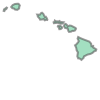

<AxesSubplot:>

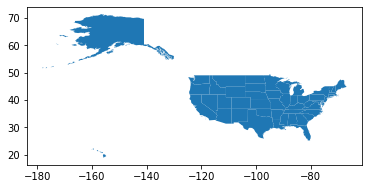

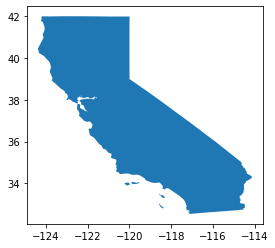

In [91]:
display(usa.plot())
display(usa.loc[0, 'geometry'])
usa[usa.STATE_ABBR == 'CA'].plot()

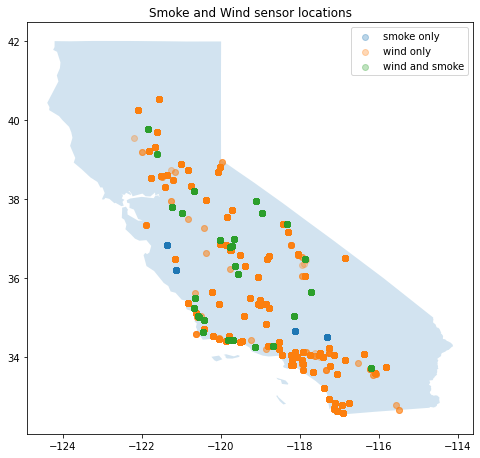

In [187]:
# assumes df has columns 'Lat' and 'Lon'

def make_CA_plot(df, title='Title goes here', size=(8, 8)):
    usa = gpd.read_file('states_21basic/states.shp')
    fig, ax = plt.subplots(figsize=size)
    usa[usa.STATE_ABBR == 'CA'].plot(ax=ax, alpha=0.2)
    
    point_data = gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df.Lon, df.Lat))
    #display(point_data.head())
    
    point_data.plot(ax=ax, legend=True)
    
    ax.set_title(title)
    
def make_CA_multi_plot(
        DFs,
        title='Title goes here', 
        labels = None,
        size=(8, 8),
        save_file=None):
        
    usa = gpd.read_file('states_21basic/states.shp')
    fig, ax = plt.subplots(figsize=size)
    usa[usa.STATE_ABBR == 'CA'].plot(ax=ax, alpha=0.2)
    
    if not labels:
        labels = ['label{}'.format(i) for i in range(len(DFs))]
    for df, label in zip(DFs, labels):
        point_data = gpd.GeoDataFrame(
            df, geometry=gpd.points_from_xy(df.Lon, df.Lat))
        point_data.plot(ax=ax, label=label, alpha=0.3)
    
  
    ax.set_title(title)
    ax.legend()
    
    if save_file:
        fig.savefig(save_file)
    
# make_CA_plot(df=sensors[pd.notna(sensors['PM2.5']) 
#                         & pd.notna(sensors['PM10'])
#                         & pd.notna(sensors['Windspeed'])
#                         & pd.notna(sensors['Winddirection'])].sample(1000), 
#              title='exact locations with both smoke and wind', size=(8, 8))

# make_CA_plot(df=smoke_wind_by_zip, 
#              title='both smoke and wind readings in the same zipcode', size=(8, 8))

make_CA_multi_plot(DFs=[
                    sensors[pd.notna(sensors['PM2.5']) 
                        & pd.notna(sensors['PM10'])
                        & pd.isna(sensors['Windspeed'])
                        & pd.isna(sensors['Winddirection'])].sample(1000),
    
                    sensors[pd.notna(sensors['Windspeed'])
                        & pd.notna(sensors['Winddirection'])
                        & pd.isna(sensors['PM2.5'])
                        & pd.isna(sensors['PM10'])].sample(5000),
                   
                    sensors[pd.notna(sensors['Windspeed'])
                        & pd.notna(sensors['Winddirection'])
                        & pd.notna(sensors['PM2.5'])
                        & pd.notna(sensors['PM10'])].sample(5000)
                        ],
                    labels=['smoke only', 'wind only', 'wind and smoke'],
                    title='Smoke and Wind sensor locations',
                    save_file='wind_smoke_venn_diagram_map.png')